# Getting Started With Quantum Bayesian Networks

## Introduction

![](images/intro.png)

![](images/1_1.PNG)

![](images/1_2.PNG)

![](images/1_3.PNG)

In [1]:
P = True
Q = False

print('not P is {}'.format(not P))
print('P and Q is {}'.format(P and Q))
print('P or Q is {}'.format(P or Q))
print('P and not Q is {}'.format(P and not Q))
#CAPTION Boolean logic in Python

not P is False
P and Q is False
P or Q is True
P and not Q is True


![](images/1_4.PNG)

![](images/1_5.PNG)

![](images/1_6.PNG)

![](images/1_7.PNG)

## Preparation

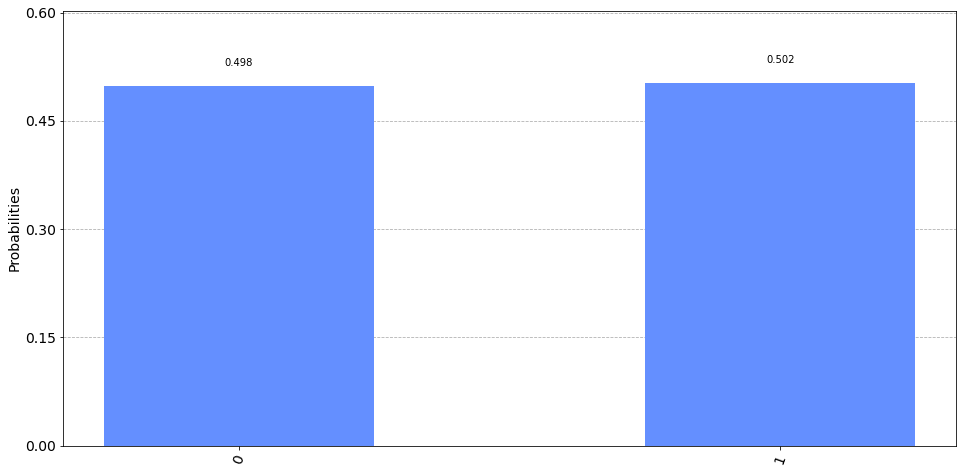

In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# YOUR CODE GOES HERE
qc.h(0)

# measure the qubit
qc.measure_all()

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('qasm_simulator') 

# Do the simulation, returning the result
results = execute(qc,backend, shots=1000).result()

# get the probability distribution
counts = results.get_counts()

# Show the histogram
plot_histogram(counts, figsize=(16,8))

In [3]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def run_circuit(qc, simulator='qasm_simulator', shots=1000, hist=True):
    # Tell Qiskit how to simulate our circuit
    backend = Aer.get_backend(simulator)

    # execute the qc
    results = execute(qc,backend, shots=shots).result().get_counts()

    # plot the results
    return plot_histogram(results, figsize=(16,8)) if hist else results
#CAPTION Convenience function to handle QuantumCircuits

![](images/2_3.PNG)

![](images/2_4.PNG)

![](images/2_5.PNG)

![](images/2_6.PNG)

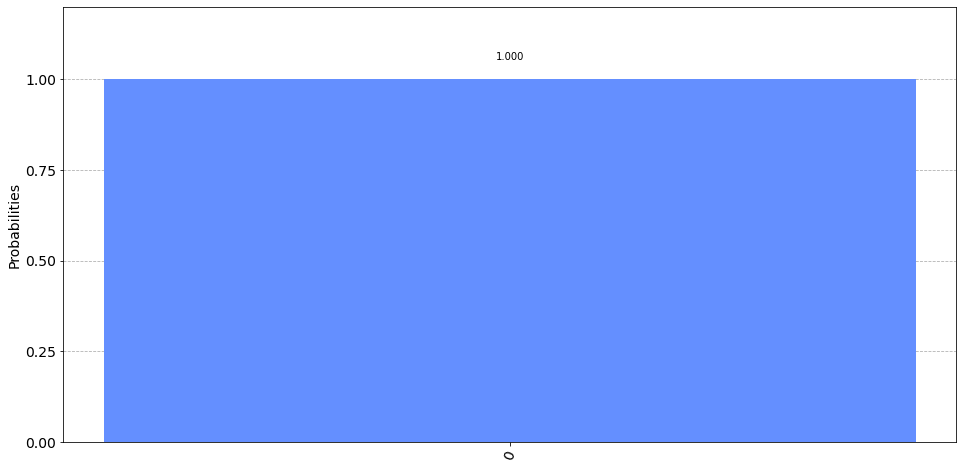

In [4]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# YOUR CODE GOES HERE
qc.h(0)
qc.h(0)

# measure the qubit
qc.measure_all()
run_circuit(qc)
#CAPTION Applying the Hadamard gate twice 

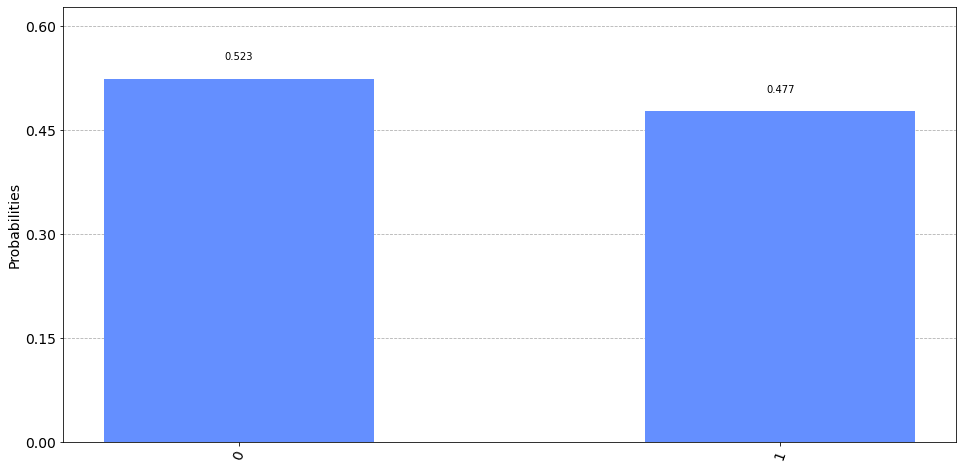

In [5]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# YOUR CODE GOES HERE
qc.x(0)
qc.h(0)

# measure the qubit
qc.measure_all()
run_circuit(qc)
#CAPTION Applying the Hadamard gate twice 

![](images/2_9.PNG)

In [6]:
![](images/2_10.PNG)

/usr/bin/sh: 1: Syntax error: word unexpected (expecting ")")


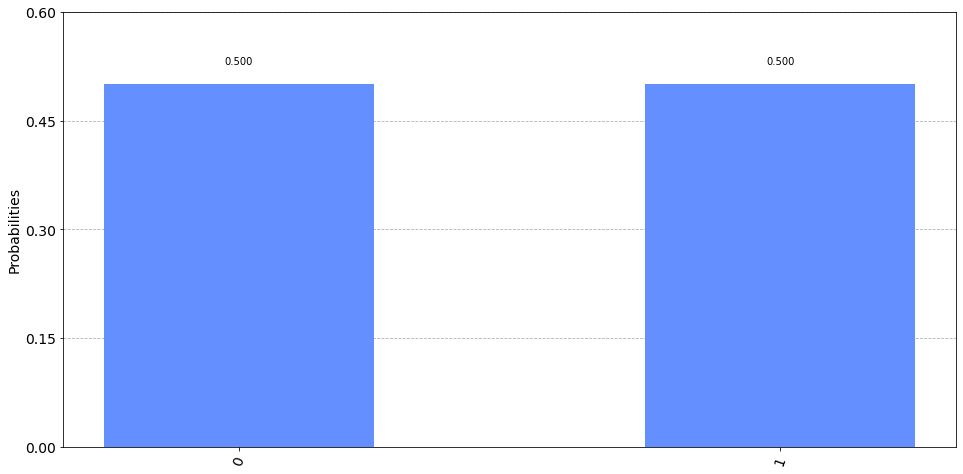

In [7]:
from math import pi

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# rotate the qubit state vector
qc.ry(pi/2, 0)

# measure the qubit
qc.measure_all()
run_circuit(qc)
#CAPTION Applying the Hadamard gate twice 

In [8]:
from math import asin, sqrt

def prob_to_angle(theta):
    return 2*asin(sqrt(theta))

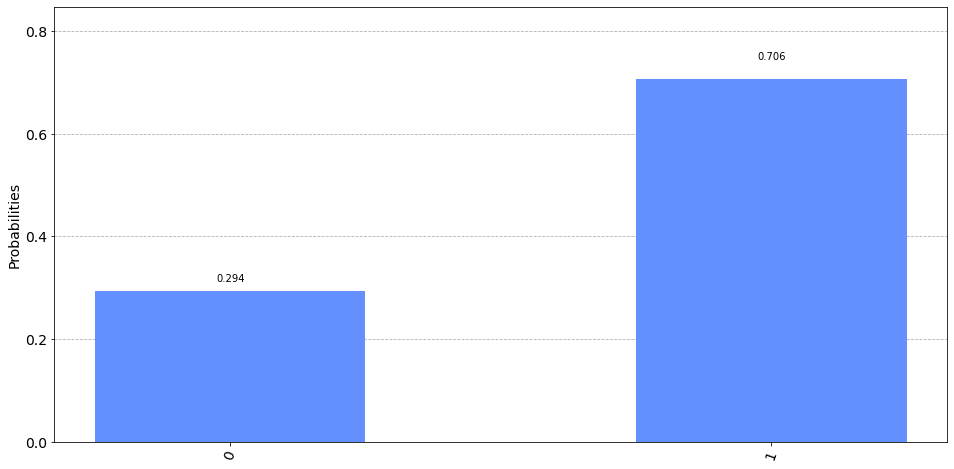

In [9]:
from math import pi

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# rotate the qubit state vector to represent 0.7
qc.ry(prob_to_angle(0.7), 0)

# measure the qubit
qc.measure_all()
run_circuit(qc)
#CAPTION Applying the Hadamard gate twice 

![](images/2_13.PNG)

![](images/2_14.PNG)

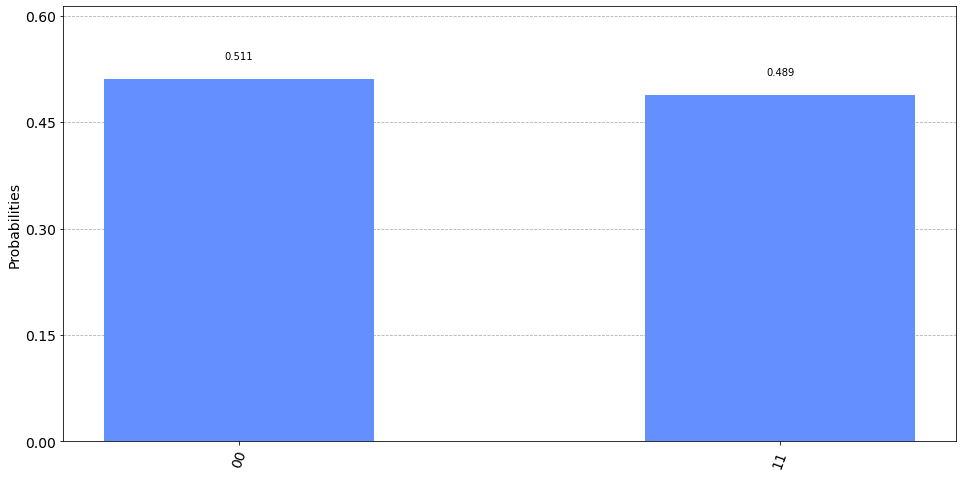

In [10]:
# Create a quantum circuit with two qubits
qc = QuantumCircuit(2)

# apply the Hadamard gate on qubit 0
qc.h(0)

# apply the CNOT gate with qubit 0 as the control and qubit 1 as the target qubit
qc.cx(0,1)                    

# measure the qubit
qc.measure_all()
run_circuit(qc)
#CAPTION Applying the Hadamard gate twice

![](images/2_16.PNG)

## Variables

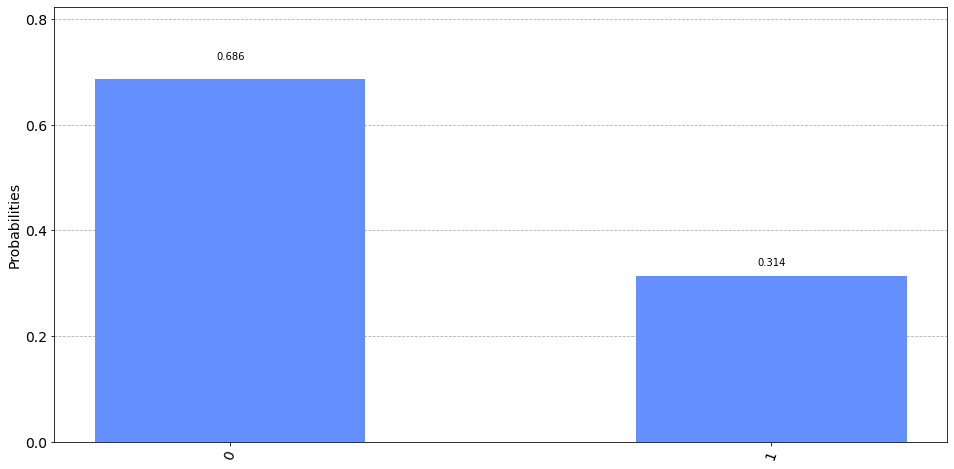

In [11]:
# Specify the marginal probability of the event
# easy_to_use
easy_to_use = 0.3

qc = QuantumCircuit(1)

# Apply the marginal probability
qc.ry(prob_to_angle(easy_to_use), 0)

qc.measure_all()

run_circuit(qc)
#CAPTION Representing the marginal probability

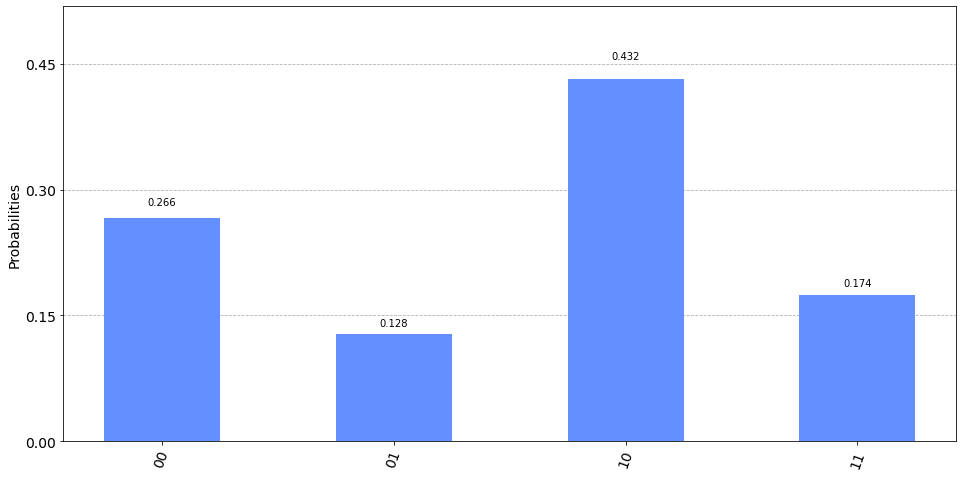

In [12]:
# Specify the marginal probabilities
easy_to_use = 0.3
usefulness = 0.6

qc = QuantumCircuit(2)

# Apply the marginal probabilities
qc.ry(prob_to_angle(easy_to_use), 0)
qc.ry(prob_to_angle(usefulness), 1)

qc.measure_all()

run_circuit(qc)
#CAPTION Representing the marginal probability

![](images/3_3.PNG)

![](images/3_4.PNG)

![](images/3_5.PNG)

![](images/3_6.PNG)

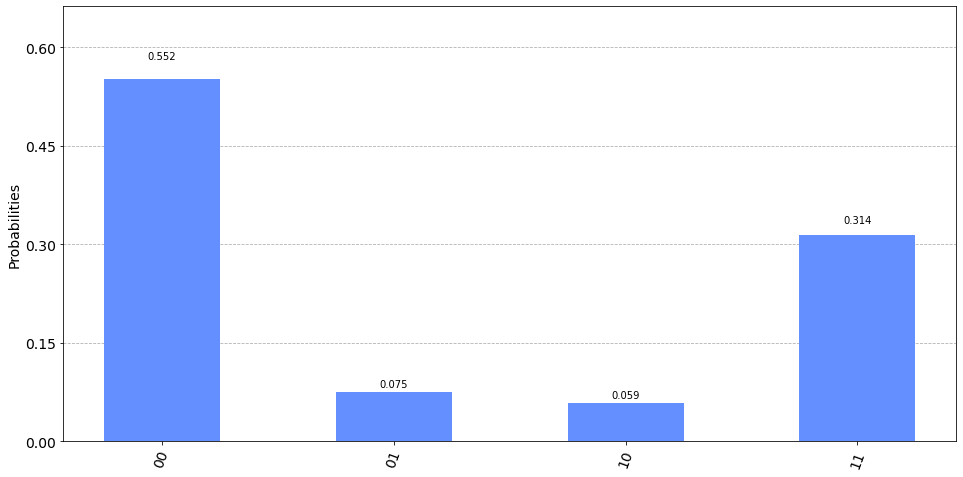

In [13]:
# Specify the marginal probability
intention = 0.4

# Specify the conditional probabilities
use_intention = 0.8
use_nointention = 0.1

qc = QuantumCircuit(2)

# Apply the marginal probability
qc.ry(prob_to_angle(intention), 0)

# apply the conditional probability
# when the user intends to use the system
qc.cry(prob_to_angle(use_intention), 0, 1)

# apply the conditional probability
# when the user does not intend to use the system
qc.x(0)
qc.cry(prob_to_angle(use_nointention), 0, 1)
qc.x(0)

qc.measure_all()

counts = run_circuit(qc, hist=False)
plot_histogram(counts, figsize=(16,8))
#CAPTION Representing the marginal probability

In [14]:
print("P(Intention): {}".format(
    round((counts['01']+counts['11'])/1000, 2)
))

print("P(Use|No Intention): {}".format(
    round(counts['10']/(counts['10']+counts['00']), 2)
))

print("P(Use|Intention): {}".format(
    round(counts['11']/(counts['11']+counts['01']), 2)
))

print("P(Use): {}".format(
    round((counts['10']+counts['11'])/1000, 2)
))
#CAPTION The resulting probabilities

P(Intention): 0.39
P(Use|No Intention): 0.1
P(Use|Intention): 0.81
P(Use): 0.37


## Complete QBN

![](images/4_1.PNG)

In [15]:
from qiskit import QuantumRegister, ClassicalRegister
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr, cr)
#CAPTION Specify the quantum circuit

In [16]:
# Specify the marginal probabilities
easy_to_use = 0.3
usefulness = 0.6

# Apply the marginal probabilities
qc.ry(prob_to_angle(easy_to_use), 0)
qc.ry(prob_to_angle(usefulness), 1)
#CAPTION Specify the marginal probabilities

![](images/4_2.PNG)

In [17]:
# Specify the conditional probabilities
intention_easy_useful = 0.9
intention_noeasy_useful = 0.7
intention_easy_nouseful = 0.2
intention_noeasy_nouseful = 0.1

# easy to use and useful
qc.mcry(prob_to_angle(intention_easy_useful), [qr[0], qr[1]], qr[2])

# not easy to use but useful
qc.x(0)
qc.mcry(prob_to_angle(intention_noeasy_useful), [qr[0], qr[1]], qr[2])
qc.x(0)

# easy to use but not useful
qc.x(1)
qc.mcry(prob_to_angle(intention_easy_nouseful), [qr[0], qr[1]], qr[2])
qc.x(1)

# not easy to use and not useful
qc.x(0)
qc.x(1)
qc.mcry(prob_to_angle(intention_noeasy_nouseful), [qr[0], qr[1]], qr[2])
qc.x(0)
qc.x(1)
#CAPTION The conditional probabilities of intention to use

In [18]:
# Specify the conditional probabilities
use_intention = 0.8
use_nointention = 0.1

# apply the conditional probability
# when the user intends to use the system
qc.cry(prob_to_angle(use_intention), 2, 3)

# apply the conditional probability
# when the user does not intend to use the system
qc.x(2)
qc.cry(prob_to_angle(use_nointention), 2, 3)
qc.x(2)
#CAPTION The conditional probability on the actual use

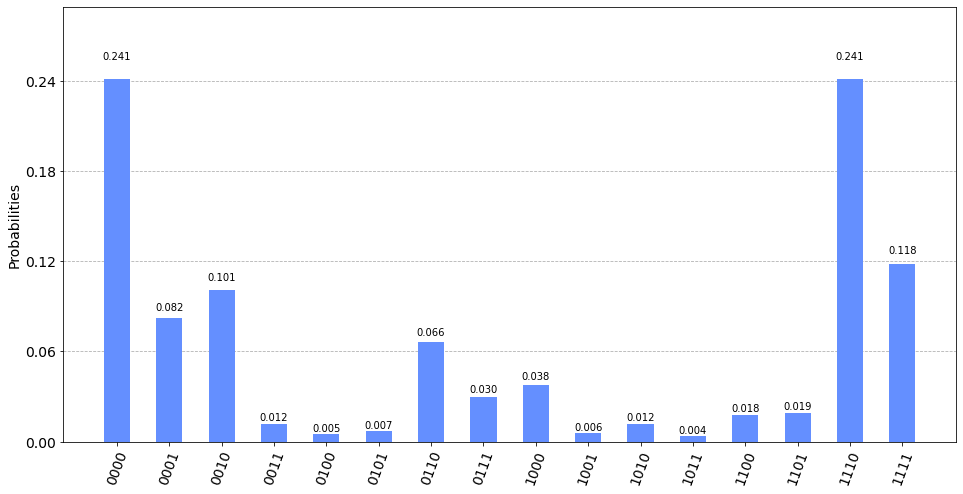

In [19]:
qc.measure(qr, cr)

counts = run_circuit(qc, hist=False)
plot_histogram(counts, figsize=(16,8))
#CAPTION Measuring and running the circuit

In [20]:
print("P(Use): {}".format(
    round(sum(
        counts[key] for key in filter(
            lambda cnt: cnt[0] == '1',
            counts.keys()
        )
    )/1000, 2)
))
#CAPTION The marginal probability of the system being used

P(Use): 0.46


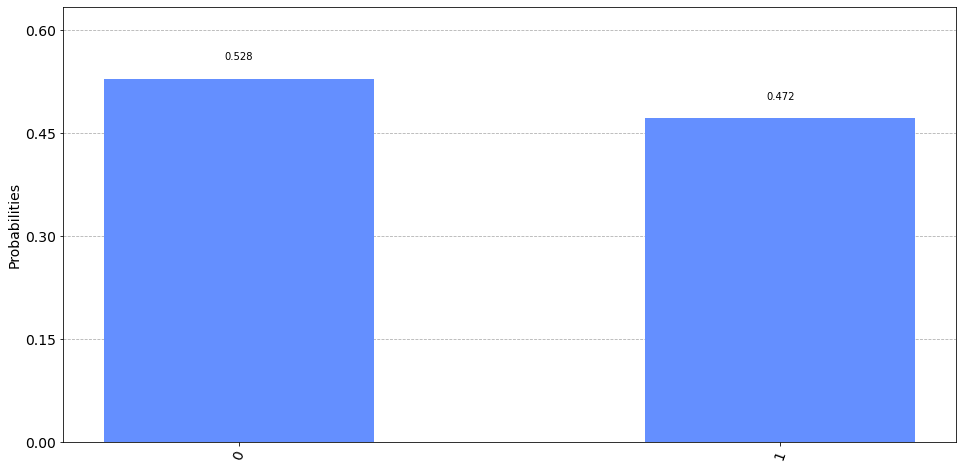

In [21]:
qr = QuantumRegister(4)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

# Specify the marginal probabilities
easy_to_use = 0.3
usefulness = 0.6

# Apply the marginal probabilities
qc.ry(prob_to_angle(easy_to_use), 0)
qc.ry(prob_to_angle(usefulness), 1)


# Specify the conditional probabilities
intention_easy_useful = 0.9
intention_noeasy_useful = 0.7
intention_easy_nouseful = 0.2
intention_noeasy_nouseful = 0.1

# easy to use and useful
qc.mcry(prob_to_angle(intention_easy_useful), [qr[0], qr[1]], qr[2])

# not easy to use but useful
qc.x(0)
qc.mcry(prob_to_angle(intention_noeasy_useful), [qr[0], qr[1]], qr[2])
qc.x(0)

# easy to use but not useful
qc.x(1)
qc.mcry(prob_to_angle(intention_easy_nouseful), [qr[0], qr[1]], qr[2])
qc.x(1)

# not easy to use and not useful
qc.x(0)
qc.x(1)
qc.mcry(prob_to_angle(intention_noeasy_nouseful), [qr[0], qr[1]], qr[2])
qc.x(0)
qc.x(1)

# Specify the conditional probabilities
use_intention = 0.8
use_nointention = 0.1

# apply the conditional probability
# when the user intends to use the system
qc.cry(prob_to_angle(use_intention), 2, 3)

# apply the conditional probability
# when the user does not intend to use the system
qc.x(2)
qc.cry(prob_to_angle(use_nointention), 2, 3)
qc.x(2)


# only measure the qubit representing the actual use
qc.measure(qr[3], cr[0])

run_circuit(qc)
#CAPTION The complete code

## Conclusion

![](images/5_1.PNG)

![](images/5_2.PNG)

![](images/5_3.PNG)